In [1]:
# Sample API
import flowx
import simulation
import numpy

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars   = ['pres', 'delp', 'divv', 'asol', 'eror']
face_vars     = ['velc', 'hvar', 'asol', 'eror']

ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']

scalar_info     = dict(tmax =  2, dt = 0.001, Re = 1.0)
simulation_info = dict(time_stepping = 'euler', 
                       poisson_solver = 'direct', 
                       maxiter = 3000, 
                       pressure_correct = True)

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

gridc, gridx, gridy, scalars, particles = flowx.domain.Domain(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson.Poisson(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound.ImBound()

ins = flowx.ins.IncompNS(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
simulation.update_bc_val(gridx, gridy, 'velc', scalars.to)
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

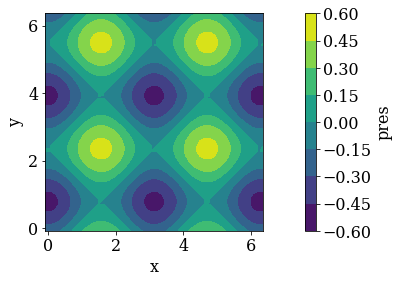

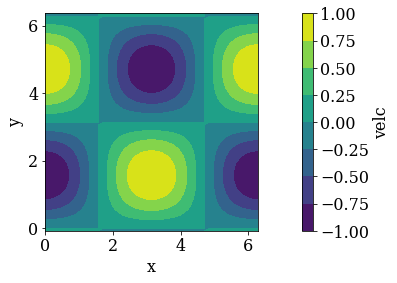

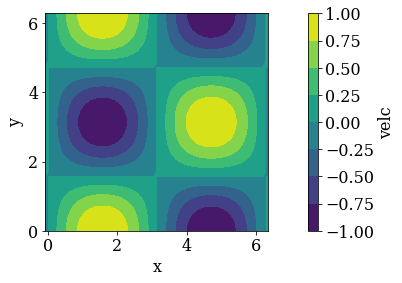

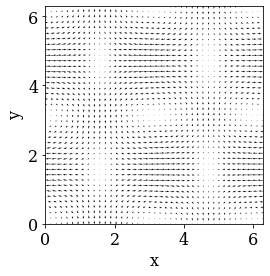

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
while scalars.time <= scalars.tmax:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.time)
    
    ins.advance()
    
    # Display stats
    if scalars.nstep % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.353189162743653e-13
Total poisson time : 0.00276947021484375
Total INS time : 0.004214763641357422
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 1.1502684131799197, -1.9675644721562635
Max, Min, DIV : 8.881784197001252e-16, -8.881784197001252e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.716163318756208e-13
Total poisson time : 0.002496004104614258
Total INS time : 0.003205537796020508
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : 1.0483152036278833, 0.023283832967913698
Max, Min, DIV : 7.216449660063518e-16, -7.771561172376096e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.02000000000000001 ---------------
Num

------------ Time = 0.19000000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.533967954726255e-13
Total poisson time : 0.0024492740631103516
Total INS time : 0.003143310546875
Max, Min, U   : 0.6817532927149613, -0.6817532927149612
Max, Min, V   : 0.6817532927149612, -0.6817532927149613
Max, Min, P   : 15.81347016523029, 15.27420620315606
Max, Min, DIV : 6.938893903907228e-16, -6.661338147750939e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.20000000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2485087730228679e-12
Total poisson time : 0.002444744110107422
Total INS time : 0.003139972686767578
Max, Min, U   : 0.668253673041717, -0.6682536730417169
Max, Min, V   : 0.6682536730417169, -0.668253673041717
Max, Min, P   : 16.467294234831684, 15.946099677270075
Max, Min, DIV : 7.216449660063518e-16, -6.661338147750939e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.21000000000000016 ---------

Qin, Qout     : 0.0, 0.0


------------ Time = 0.3800000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9917287721107667e-13
Total poisson time : 0.0024497509002685547
Total INS time : 0.0031425952911376953
Max, Min, U   : 0.466224767491217, -0.46622476749121694
Max, Min, V   : 0.46622476749121694, -0.466224767491217
Max, Min, P   : 9.867353909296117, 9.57346753339445
Max, Min, DIV : 3.885780586188048e-16, -3.885780586188048e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.3900000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5845324342982274e-13
Total poisson time : 0.0024671554565429688
Total INS time : 0.003161191940307617
Max, Min, U   : 0.45699289855764136, -0.4569928985576413
Max, Min, V   : 0.4569928985576413, -0.45699289855764136
Max, Min, P   : 9.437877178511103, 9.152445496573566
Max, Min, DIV : 3.885780586188048e-16, -3.885780586188048e-16
Qin, Qout     : 0.0, 0.0


------------ Time

------------ Time = 0.5600000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6322139423425613e-13
Total poisson time : 0.0024106502532958984
Total INS time : 0.0030794143676757812
Max, Min, U   : 0.3252739829065929, -0.3252739829065929
Max, Min, V   : 0.3252739829065929, -0.3252739829065929
Max, Min, P   : 9.658569557249285, 9.448811313711797
Max, Min, DIV : 3.5388358909926865e-16, -3.469446951953614e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.5700000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6724418226243122e-13
Total poisson time : 0.002380847930908203
Total INS time : 0.003046751022338867
Max, Min, U   : 0.3188331265062465, -0.3188331265062465
Max, Min, V   : 0.3188331265062465, -0.3188331265062465
Max, Min, P   : 9.368946052162874, 9.161262078187024
Max, Min, DIV : 3.608224830031759e-16, -3.3306690738754696e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.5800000000000004 -----

------------ Time = 0.7600000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.925907859701764e-14
Total poisson time : 0.0024619102478027344
Total INS time : 0.003142833709716797
Max, Min, U   : 0.21803767119614303, -0.218037671196143
Max, Min, V   : 0.218037671196143, -0.21803767119614303
Max, Min, P   : 10.469373949552867, 10.288798186128295
Max, Min, DIV : 1.8041124150158794e-16, -1.8041124150158794e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.7700000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.785488380994742e-14
Total poisson time : 0.003063678741455078
Total INS time : 0.003851652145385742
Max, Min, U   : 0.21372023603735393, -0.2137202360373539
Max, Min, V   : 0.2137202360373539, -0.21372023603735393
Max, Min, P   : 9.380754401408911, 9.201114918347177
Max, Min, DIV : 1.8041124150158794e-16, -1.8041124150158794e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.7800000000000006 --

------------ Time = 0.9600000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.5536164258974855e-14
Total poisson time : 0.0023598670959472656
Total INS time : 0.0030291080474853516
Max, Min, U   : 0.14615502179370213, -0.14615502179370213
Max, Min, V   : 0.14615502179370213, -0.14615502179370213
Max, Min, P   : 9.766319643804348, 9.598914922086802
Max, Min, DIV : 1.734723475976807e-16, -1.5265566588595902e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.9700000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.087747908484728e-14
Total poisson time : 0.0023527145385742188
Total INS time : 0.003015756607055664
Max, Min, U   : 0.14326095845930673, -0.1432609584593067
Max, Min, V   : 0.1432609584593067, -0.14326095845930673
Max, Min, P   : 9.270899388009969, 9.103917477279575
Max, Min, DIV : 1.5959455978986625e-16, -1.734723475976807e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.9800000000000008

------------ Time = 1.169999999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1938493120421623e-15
Total poisson time : 0.0023653507232666016
Total INS time : 0.003051280975341797
Max, Min, U   : 0.0960306922695559, -0.0960306922695559
Max, Min, V   : 0.0960306922695559, -0.0960306922695559
Max, Min, P   : 9.60246680653566, 9.4412142811454
Max, Min, DIV : 9.020562075079397e-17, -9.020562075079397e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.1799999999999808 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0663811303040966e-13
Total poisson time : 0.0023491382598876953
Total INS time : 0.003008127212524414
Max, Min, U   : 0.09412915715934818, -0.09412915715934818
Max, Min, V   : 0.09412915715934818, -0.09412915715934818
Max, Min, P   : 9.540111597451231, 9.379043516745451
Max, Min, DIV : 8.326672684688674e-17, -9.020562075079397e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.1899999999999797 -------

------------ Time = 1.3799999999999588 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.855338985840645e-14
Total poisson time : 0.0023696422576904297
Total INS time : 0.003041982650756836
Max, Min, U   : 0.06309707756485074, -0.06309707756485072
Max, Min, V   : 0.06309707756485072, -0.06309707756485071
Max, Min, P   : 8.209122070638823, 8.050557833642964
Max, Min, DIV : 4.85722573273506e-17, -4.85722573273506e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.3899999999999577 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.177077747190177e-14
Total poisson time : 0.00237274169921875
Total INS time : 0.00304412841796875
Max, Min, U   : 0.061848449614535, -0.061848449614535
Max, Min, V   : 0.06184844961453499, -0.06184844961453499
Max, Min, P   : 8.161821954786918, 8.003338532597217
Max, Min, DIV : 5.551115123125783e-17, -4.85722573273506e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.3999999999999566 -----------

------------ Time = 1.5899999999999357 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.641533002819628e-14
Total poisson time : 0.002359628677368164
Total INS time : 0.003026723861694336
Max, Min, U   : 0.041469378222237764, -0.04146937822223776
Max, Min, V   : 0.04146937822223776, -0.04146937822223776
Max, Min, P   : 8.061078803871286, 7.903695189402818
Max, Min, DIV : 4.163336342344337e-17, -4.163336342344337e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.5999999999999346 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.940293295057403e-14
Total poisson time : 0.0023581981658935547
Total INS time : 0.0030281543731689453
Max, Min, U   : 0.04064881103070013, -0.04064881103070012
Max, Min, V   : 0.04064881103070012, -0.04064881103070013
Max, Min, P   : 8.031853678931352, 7.874505688964213
Max, Min, DIV : 3.9898639947466563e-17, -4.163336342344337e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.6099999999999335

------------ Time = 1.7999999999999126 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2810344969999074e-14
Total poisson time : 0.002365589141845703
Total INS time : 0.0030579566955566406
Max, Min, U   : 0.02725605689691775, -0.027256056896917746
Max, Min, V   : 0.027256056896917746, -0.02725605689691775
Max, Min, P   : 8.270443594934711, 8.113582055803045
Max, Min, DIV : 2.2551405187698492e-17, -2.42861286636753e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.8099999999999115 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1116457044223645e-14
Total poisson time : 0.002367258071899414
Total INS time : 0.0030355453491210938
Max, Min, U   : 0.026716788220747925, -0.02671678822074792
Max, Min, V   : 0.026716788220747925, -0.026716788220747925
Max, Min, P   : 8.18734061326996, 8.030494905943511
Max, Min, DIV : 2.2551405187698492e-17, -2.2551405187698492e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.8199999999

In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.time)

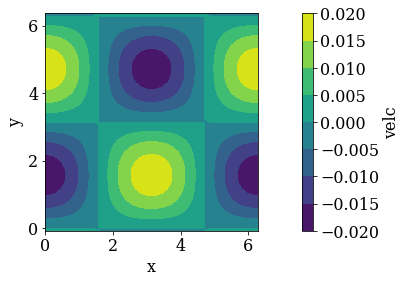

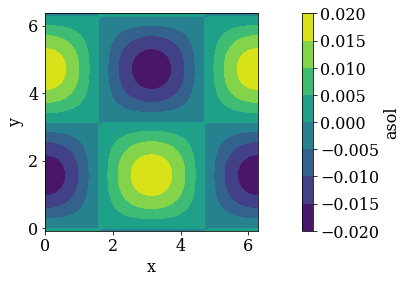

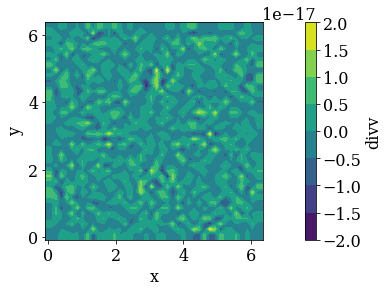

In [7]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [8]:
gridx.compute_error('eror','velc','asol')
gridy.compute_error('eror','velc','asol')

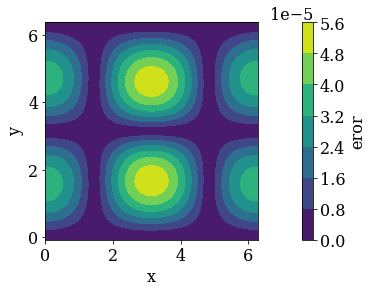

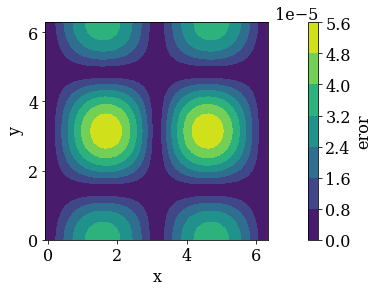

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')